# __Create your first DFN__

### Problem statement
The fractured system is conceptualized as a population of discrete fractures (the DFN), embedded in a spatial domain.
<br>
We here create a DFN, embedded in a cubic domain, with two types of fractures: 
- planar fractures (either disks or polygons), that may be modelled deterministically or stochastically
- non-planar fractures, imported from geometry files (STL format).

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/fractures.png" width="500"/>
</div>
<br>
Example of DFN
</center>

### What will you learn ?
- Create planar fractures (disks and polygons)
- Create a set of fractures from statistical models
- Import non-planar fractures from STL files
- Create a DFN by inserting a list of fractures

### DFN.Lab model

In this example, fractures are disk-shaped or polygon-shaped. A DFN is defined as a population of fractures.
The DFN is attached to the system, and fractures intersecting the system domain are truncated.
<br>
You should be familiar with tutorial ["Create a domain"](002-Domain.ipynb).
<br>
The required module to create a DFN is __Fractures__.

In [1]:
import dfnlab.Fractures as dfn

_____________

## Create planar fractures

### Initialize system
We begin by defining a system consisting of a cubic domain, representing the modeling volume, with a side length of $10m$, centered at coordinates $(0, 0, 0)$.

It is important to note that in this specific example, there are no fracture domains defined. Consequently, the entire global domain is treated as a single fracture domain. Given the absence of fracture subdivisions, the octree discretization is not required for this case.

In [2]:
import dfnlab.System as sys
import dfnlab.Domains as dom

system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0.,0.,0.], L1=10., L2=10., L3=10.)
system.setDomain(domain)

### Create the DFN
We create an empty _DFN_ object linked to the _system_. 

In [3]:
fnet = dfn.DFN()
system.setDFN(fnet)

### Create fractures
You first need to define the geometry of the fracture. It can be a disk or a polygon. Here we use a polygonal fracture, defined by its vertices.

In [4]:
import dfnlab.Geometry as geom

pol = geom.Polygon()
pol.append([0, 0, -2])
pol.append([4, 0, -2])
pol.append([4, 4, -2])
pol.append([0, 4, -2])
fpol = dfn.Fracture(pol)

You can get some geometrical properties like the size and the area:

In [5]:
print("Fracture size is {}".format(fpol.getSize()))
print("Fracture area is {}".format(fpol.getArea()))

Fracture size is 5.656854249492381
Fracture area is 16.0


### Populate the DFN
Add it into your DFN.

In [6]:
fnet.addFracture(fpol)

True

After adding fractures to the Discrete Fracture Network (DFN) in DFN.lab, you have the option to include "extras" for each fracture. These extras are essentially tags consisting of a name and a corresponding value. They provide a straightforward way to associate additional information with each fracture, which can be utilized for visualization or analysis purposes.

It is important to note that while DFN.lab stores these extras along with the fracture data, it does not utilize them in its calculations. Instead, the extras serve as supplementary metadata that can be accessed and employed outside of the core computational processes. 

In [7]:
fnet.setFractureExtra(fpol,"exampleValue1", 1)
fnet.setFractureExtra(fpol,"exampleValue2", 3.14)

### Build the model system
Before manipulating your DFN, you need to "build" the system. This will create all interactions between the different system objects (intersections between fractures, intersection between fractures and system domains and geometries).

In [8]:
system.build()

You can visualize it 

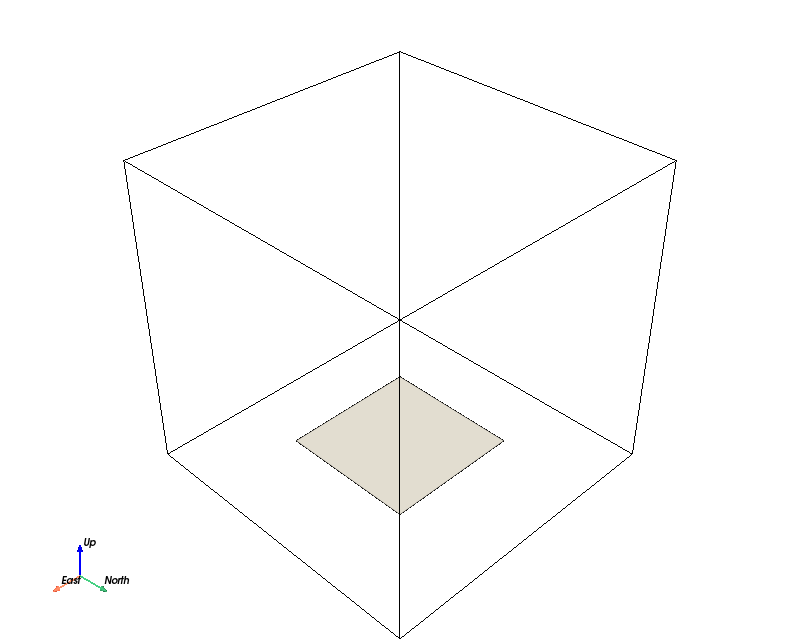

In [9]:
from sources.functions import plot_dfn
plot_dfn(system)

You can also create a disk-shaped _Fracture_, defined by its diameter, its position (the disk center) and its orientation given as dip and dip direction angles.

In [10]:
fdisk1 = dfn.Fracture(position=[0, 0, 0], size=2., dip=45., dipd=90., index=0)

print("Fracture size is {}".format(fdisk1.getSize()))
print("Fracture area is {}".format(fdisk1.getArea()))

Fracture size is 2.0
Fracture area is 3.141592653589793


Alternatively, the orientation of the fracture can be defined in terms of its pole (normal).<br>
There are utility functions to get a normal vector from the dip and dip direction angles of the fracture plane.

In [11]:
the_normal = dfn.IFracture.orientations(30., 270.)
fdisk2 = dfn.Fracture(position=[0, 0, 0], size=4., normal=the_normal, index=1)

print("Fracture size is {}".format(fdisk2.getSize()))
print("Fracture area is {}".format(fdisk2.getArea()))

Fracture size is 4.0
Fracture area is 12.566370614359172


Add them into the DFN.

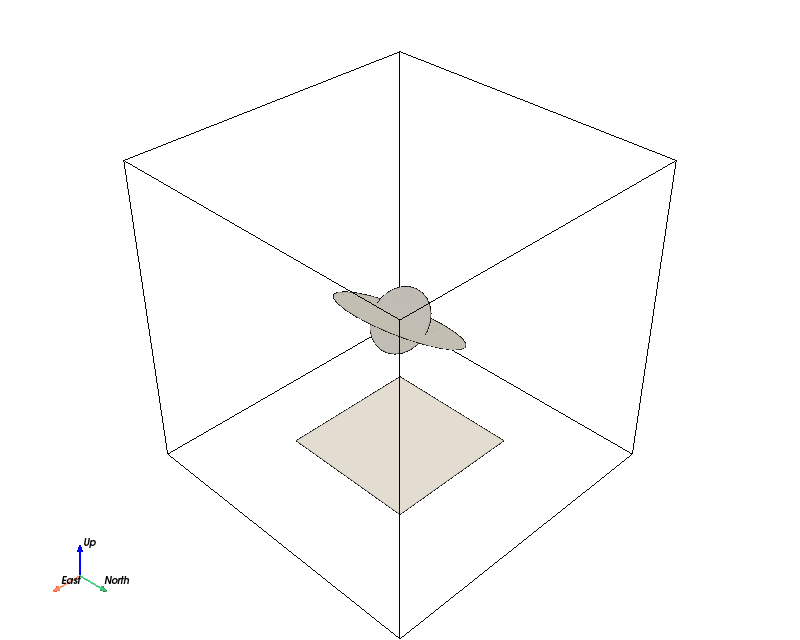

In [12]:
fnet.addFracturesList([fdisk1,fdisk2]);
system.build()
plot_dfn(system)

________________

## Create a set of fractures from statistical models
Here we create 10 fractures as disks of diameter 2m with random positions lying in the cubic domain, and random orientation (uniform).

First we create a statistical distribution using an initial random seed of 1000.

In [13]:
import dfnlab.RandomGenerator as random
stat = random.StatisticalDistribution(1000)

We need to get the corner positions of the model volume. We use the minimum (xmin,ymin,zmin) and maximum (xmax,ymax,zmax) corners to do so.

In [14]:
pmin = domain.getPMin()
pmax = domain.getPMax()

You can then make lists of fractures using loops.

In [15]:
fractureList = []
for i in range(0,11):
    pos = [stat.randomDouble(pmin[0],pmax[0]),stat.randomDouble(pmin[1],pmax[1]),stat.randomDouble(pmin[2],pmax[2])]
    normal = stat.randomUnisphere()
    fd = dfn.Fracture(position=pos, size=2., normal=normal)
    fractureList.append(fd)

You can add an entire list of fractures into the DFN. 
<br>
Fractures are automatically truncated at the edges of the domain.

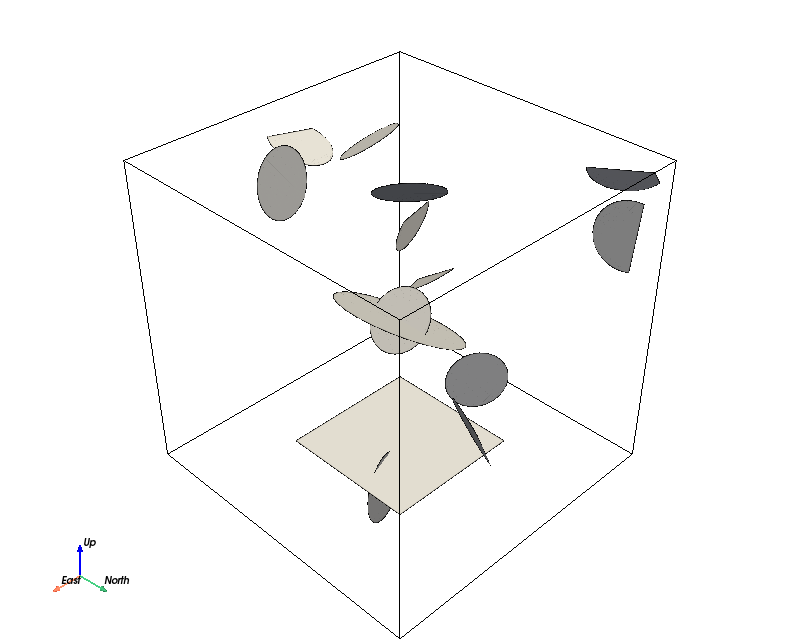

In [16]:
fnet.addFracturesList(fractureList)
system.build()
plot_dfn(system)

The generation of a fully stochastic DFN, using a generator object defined by statistical distributions is explained in ["Tutorial 006"](006-Stochastic_DFN_generation.ipynb).

___________________

## Add deterministic irregular fractures
You can also import non-planar fractures from STL files.

In [17]:
import dfnlab.Geometry as geom

reader = geom.STLReader("./sources/rough_surface.stl")
nonPlanarFracture = dfn.IrregularFracture(reader.getSurface())
fnet.addFracture(nonPlanarFracture)

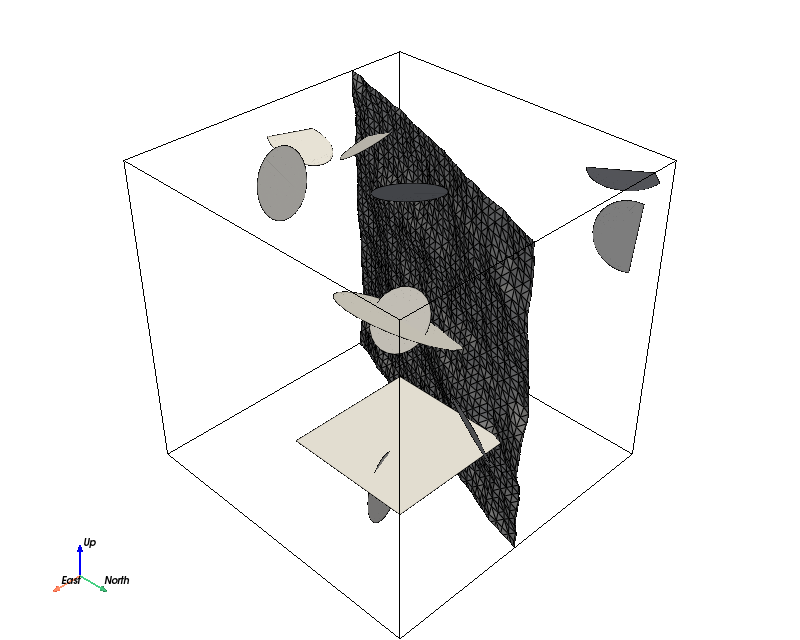

In [18]:
system.build()
plot_dfn(system)